In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [471]:
from utilis import change_date

In [472]:
from utilis import cor_features, signif_features

In [473]:
data = pd.read_csv('spotify_data.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,track,artist,album,artist pop,track pop,track genre,duration,release date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,Desperado,Rihanna,ANTI (Deluxe),87,71,barbadian pop,186466,2016-01-28,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684
1,1,1,Empire State Of Mind,JAY-Z,The Blueprint 3,80,83,east coast hip hop,276920,2009-09-08,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684
2,2,2,ARE WE STILL FRIENDS?,"Tyler, The Creator",IGOR,82,81,hip hop,265480,2019-05-17,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684
3,3,3,i love you,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",86,81,art pop,291796,2019-03-29,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684
4,4,4,Bohemian Rhapsody - Remastered 2011,Queen,A Night At The Opera (2011 Remaster),81,80,classic rock,354320,1975-11-21,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684


In [474]:
data.drop([data.columns[0], data.columns[1]], axis=1, inplace=True)
data

,track,artist,album,artist pop,track pop,track genre,duration,release date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Desperado,Rihanna,ANTI (Deluxe),87,71,barbadian pop,186466,2016-01-28,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,0.443,126.684
1,Empire State Of Mind,JAY-Z,The Blueprint 3,80,83,east coast hip hop,276920,2009-09-08,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,0.443,126.684
2,ARE WE STILL FRIENDS?,"Tyler, The Creator",IGOR,82,81,hip hop,265480,2019-05-17,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,0.443,126.684
3,i love you,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",86,81,art pop,291796,2019-03-29,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,0.443,126.684
4,Bohemian Rhapsody - Remastered 2011,Queen,A Night At The Opera (2011 Remaster),81,80,classic rock,354320,1975-11-21,0.553,0.586,-6.319,0.0362,0.697000,0.00000,0.0813,0.443,126.684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,My Sacrifice,Creed,Weathered,68,73,alternative metal,294600,2001-01-01,0.459,0.830,-6.254,0.0364,0.000051,0.00014,0.2060,0.431,155.827
2237,Hemorrhage (In My Hands),Fuel,Something Like Human,52,62,alternative metal,236866,2000-09-19,0.459,0.830,-6.254,0.0364,0.000051,0.00014,0.2060,0.431,155.827
2238,A Beautiful Lie,Thirty Seconds To Mars,A Beautiful Lie,67,52,modern rock,245306,2005-01-01,0.459,0.830,-6.254,0.0364,0.000051,0.00014,0.2060,0.431,155.827
2239,Wake Me up When September Ends,Green Day,American Idiot,77,76,modern rock,285653,2004-09-21,0.459,0.830,-6.254,0.0364,0.000051,0.00014,0.2060,0.431,155.827


## Sprawdzenie czy są jakieś duplikaty, ponieważ pobieram dane z wielu playlist i może być tak, że jakieś piosenki były na kilku z nich. 

In [475]:
duplicate = data.duplicated()
duplicate.sum()

4

In [476]:
data[duplicate]

,track,artist,album,artist pop,track pop,track genre,duration,release date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
678,The Thrill Is Gone,B.B. King,Deuces Wild,58,0,blues,301133,1997-01-01,0.393,0.306,-8.734,0.0278,0.588,0.00217,0.134,0.248,165.44
683,Caught Out In The Rain,Beth Hart,Bang Bang Boom Boom,47,0,modern blues,433200,2012-10-05,0.393,0.306,-8.734,0.0278,0.588,0.00217,0.134,0.248,165.44
708,Make It Rain,Ed Sheeran,x (Wembley Edition),84,47,pop,404480,2013,0.393,0.306,-8.734,0.0278,0.588,0.00217,0.134,0.248,165.44
728,Still Got The Blues,Gary Moore,Still Got The Blues,53,65,blues rock,370866,1990-01-01,0.393,0.306,-8.734,0.0278,0.588,0.00217,0.134,0.248,165.44


In [477]:
data.drop_duplicates(inplace=True)

In [478]:
data.dtypes

track                object
artist               object
album                object
artist pop            int64
track pop             int64
track genre          object
duration              int64
release date         object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

## Zmiana release date jedynie na rok 

In [479]:
data['year'] = data['release date'].apply(change_date)
data.drop(columns='release date', inplace=True)


In [480]:
data.head()

,track,artist,album,artist pop,track pop,track genre,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,Desperado,Rihanna,ANTI (Deluxe),87,71,barbadian pop,186466,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,2016
1,Empire State Of Mind,JAY-Z,The Blueprint 3,80,83,east coast hip hop,276920,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,2009
2,ARE WE STILL FRIENDS?,"Tyler, The Creator",IGOR,82,81,hip hop,265480,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,2019
3,i love you,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",86,81,art pop,291796,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,2019
4,Bohemian Rhapsody - Remastered 2011,Queen,A Night At The Opera (2011 Remaster),81,80,classic rock,354320,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,1975


In [484]:
data.isna().sum()

track               0
artist              0
album               0
artist pop          0
track pop           0
track genre         0
duration            0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
year                0
dtype: int64

# Sprawdzenie wartości null i praca z nimi


In [482]:
filt = data['track genre'].isna()
data[filt]

,track,artist,album,artist pop,track pop,track genre,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
52,Can't Hold Us (feat. Ray Dalton),Macklemore & Ryan Lewis,The Heist,60,80,NaN,258342,0.553,0.586,-6.319,0.0362,0.697000,0.000000,0.0813,0.443,126.684,2012
154,Hold On,Gus Seyffert,Hold On,8,0,NaN,294200,0.614,0.101,-22.159,0.0395,0.825000,0.021700,0.7070,0.155,75.902,2019
224,Habits of My Heart,Jaymes Young,Habits of My Heart,63,55,NaN,210639,0.707,0.632,-7.031,0.0789,0.103000,0.000011,0.0841,0.372,97.040,2014
226,Keep on Moving,Michelle Delamor,Keep on Moving,7,21,NaN,183529,0.707,0.632,-7.031,0.0789,0.103000,0.000011,0.0841,0.372,97.040,2017
235,Can't Hold Us (feat. Ray Dalton),Macklemore & Ryan Lewis,The Heist,60,80,NaN,258342,0.707,0.632,-7.031,0.0789,0.103000,0.000011,0.0841,0.372,97.040,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,18,WRRY,18,16,30,NaN,175554,0.598,0.768,-4.713,0.0484,0.106000,0.000000,0.1070,0.206,148.007,2024
2100,I Did It All for Your Love,Frettz,I Did It All for Your Love,26,16,NaN,200930,0.598,0.768,-4.713,0.0484,0.106000,0.000000,0.1070,0.206,148.007,2020
2104,Plan B,Frettz,Plan B,26,25,NaN,217021,0.598,0.768,-4.713,0.0484,0.106000,0.000000,0.1070,0.206,148.007,2024
2113,act ii: date @ 8,4batz,act ii: date @ 8,71,80,NaN,113684,0.598,0.768,-4.713,0.0484,0.106000,0.000000,0.1070,0.206,148.007,2023


In [483]:
data['track genre'].fillna('Inne', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5968\1619064986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['track genre'].fillna('Inne', inplace=True)


# EDA 

Ilość piosenek z danego roku: 

In [460]:
tracks_by_year = data.groupby('year').size().reset_index(name='count')
tracks_by_year

,year,count
0,1958,3
1,1959,1
2,1960,1
3,1961,2
4,1962,6
...,...,...
62,2020,64
63,2021,55
64,2022,77
65,2023,118


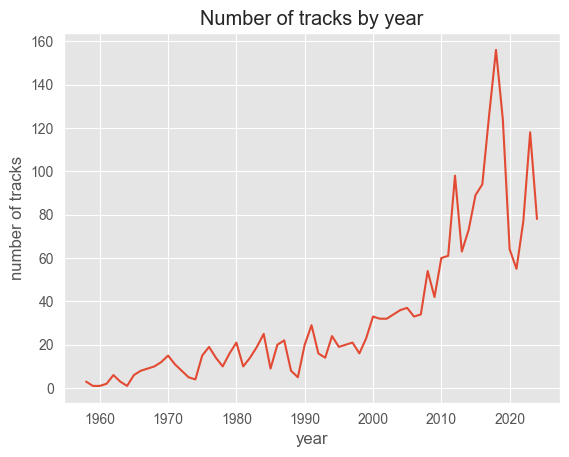

In [461]:
plt.style.use('ggplot')

tracks_by_year.plot(x='year', y='count', legend=None)
plt.xlabel('year')
plt.ylabel('number of tracks')
plt.title('Number of tracks by year')
plt.show()

# 10 najpopularniejszych wykonawców 

In [462]:
data[['artist pop', 'artist']].sort_values(by='artist pop', ascending=False).drop_duplicates(subset=['artist']).head(20)

,artist pop,artist
1602,100,Taylor Swift
1924,93,Drake
1139,92,The Weeknd
1209,92,Bad Bunny
1897,91,Kendrick Lamar
1378,91,Billie Eilish
1889,91,Travis Scott
2077,90,Future
1616,90,Ariana Grande
1900,89,Post Malone


## 10 najpopularniejszych utworów

In [463]:
data[['track pop', 'track', 'artist']].sort_values(by='track pop', ascending=False).drop_duplicates().head(20)

,track pop,track,artist
1438,94,Cruel Summer,Taylor Swift
1149,91,Sweater Weather,The Neighbourhood
559,91,Pedro,Jaxomy
926,91,As It Was,Harry Styles
1520,90,Starboy,The Weeknd
1479,90,Snooze,SZA
2074,90,See You Again (feat. Kali Uchis),"Tyler, The Creator"
237,90,Sweater Weather,The Neighbourhood
1137,89,Someone You Loved,Lewis Capaldi
1135,89,Blinding Lights,The Weeknd


# Histogramy zmiennych

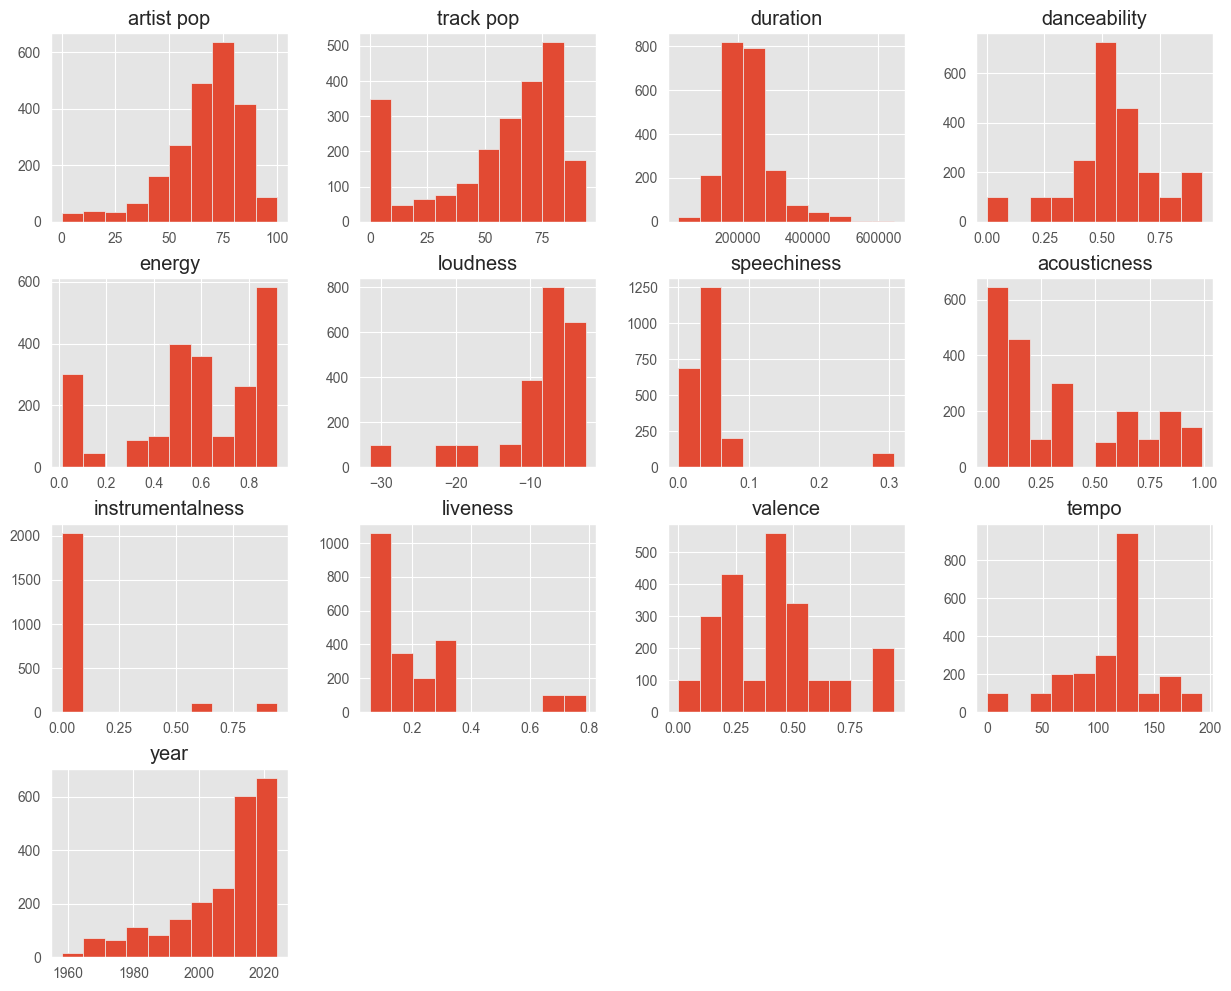

In [464]:
data.hist(figsize=(15,12),bins = 10)
plt.show()

## Najpopularniejsza piosenka względem roku 

In [465]:
best_songs = data.loc[data.groupby('year')['track pop'].idxmax()]
best_songs[['track', 'year']]

,track,year
1735,Jailhouse Rock,1958
1801,Johnny B. Goode,1959
1958,At Last,1960
1027,Can't Help Falling in Love,1961
1831,"Oh, Pretty Woman",1962
...,...,...
1135,Blinding Lights,2020
567,Give It To Me - Full Vocal Mix,2021
926,As It Was,2022
560,Prada,2023


## Korelacje

In [466]:
def correlation_plot(feature1, feature2):
    plt.figure(figsize=(10,6))
    sns.regplot(data = data, y= feature1, x = feature2, color = "c").set(title=f"{feature1} vs {feature2}")

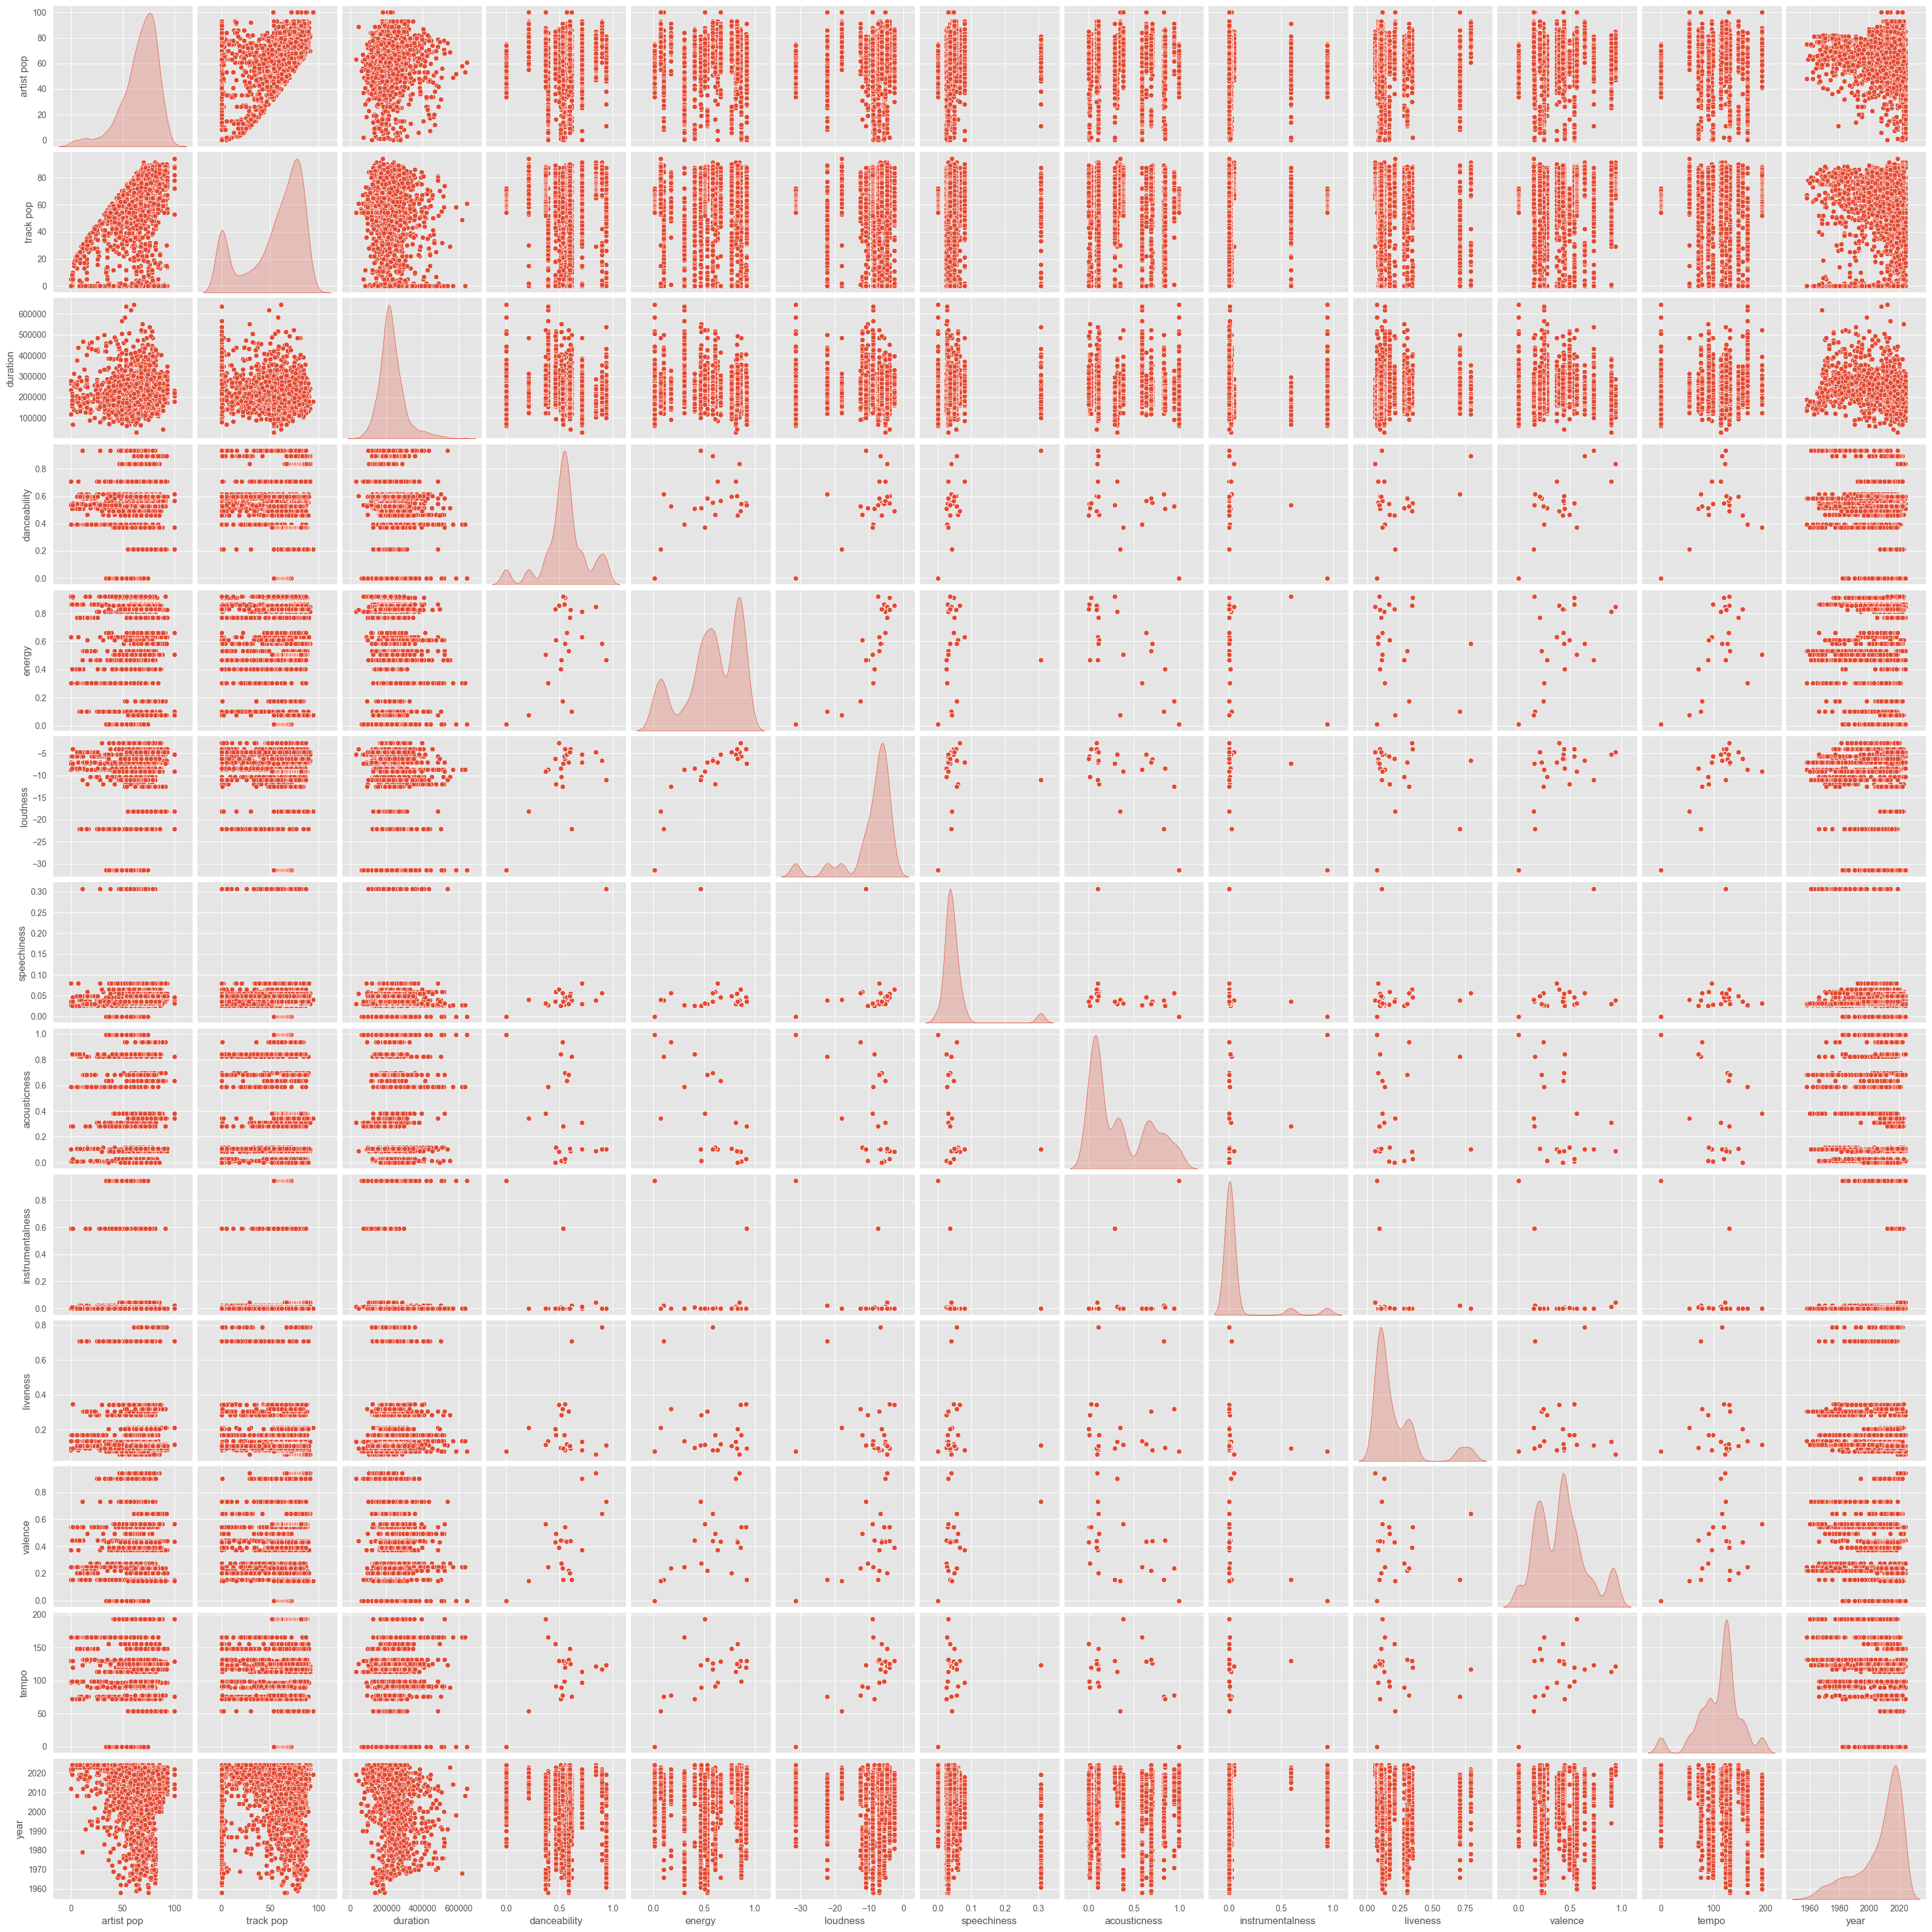

In [467]:
sns.pairplot(data, diag_kind='kde')   

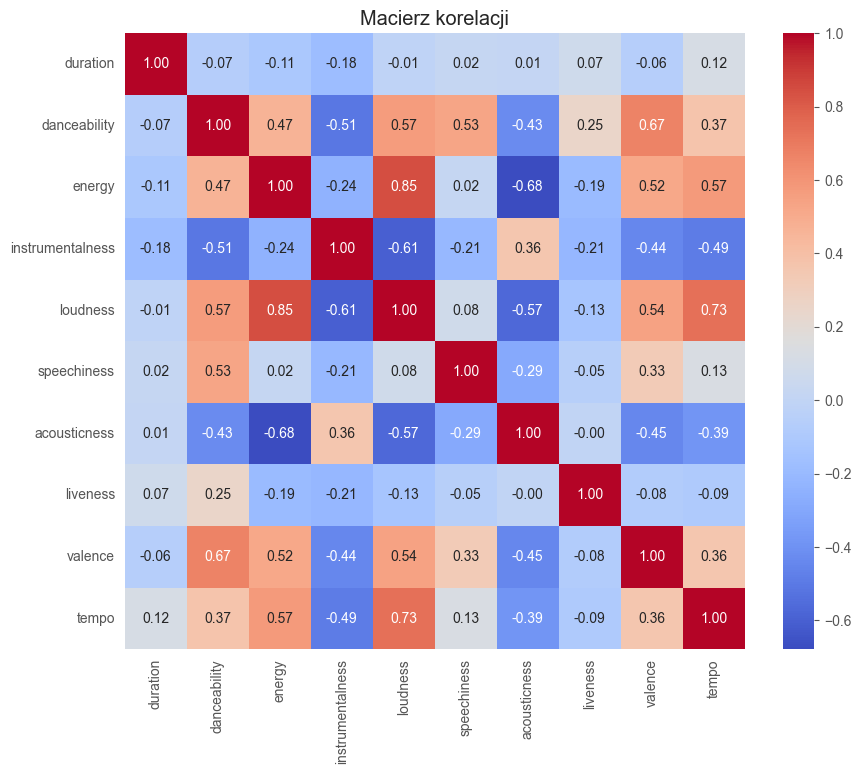

In [485]:
columns = ['duration', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
correlation_matrix = data[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

## Charakteryzacja gatunków 

In [486]:
data['track genre'].value_counts()

track genre
dance pop            160
Inne                 145
album rock           130
pop                  126
alternative metal    105
                    ... 
acoustic punk          1
canadian indie         1
banjo                  1
dark cabaret           1
candy pop              1
Name: count, Length: 364, dtype: int64

In [491]:
import re
def change_genre(x):
    if re.search('pop', x):
        return 'pop'
    elif re.search('hip hop', x):
        return 'hip hop'
    elif re.search('rock', x):
        return 'rock'
    elif re.search('blues', x):
        return 'blues'
    elif re.search('indie', x):
        return 'indie'
    elif re.search('folk', x):
        return 'folk'
    elif re.search('metal', x):
        return 'metal'
    elif re.search('jazz', x):
        return 'jazz'
    elif re.search('soul', x):
        return 'soul'
    elif re.search('dance', x):
        return 'dance'
    elif re.search('rap', x):
        return 'rap'
    elif re.search('classical', x):
        return 'classical'
    else:
        return 'other'
data['new genre'] = data['track genre'].apply(change_genre)
data[['new genre', 'track genre']]

,new genre,track genre
0,pop,barbadian pop
1,hip hop,east coast hip hop
2,hip hop,hip hop
3,pop,art pop
4,rock,classic rock
...,...,...
2236,metal,alternative metal
2237,metal,alternative metal
2238,rock,modern rock
2239,rock,modern rock


In [495]:
number_genre = data.groupby('new genre').size().reset_index(name='count')
number_genre.sort_values(by='count', ascending=False)

,new genre,count
8,other,670
9,pop,557
11,rock,383
7,metal,138
4,hip hop,127
10,rap,85
5,indie,82
1,classical,72
0,blues,49
12,soul,42


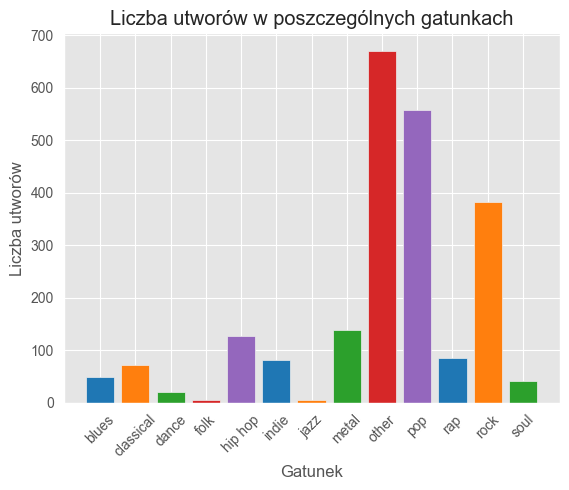

In [499]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.bar(number_genre['new genre'], number_genre['count'], color=colors)
plt.xlabel('Gatunek')
plt.ylabel('Liczba utworów')
plt.title('Liczba utworów w poszczególnych gatunkach')
plt.xticks(rotation=45)
plt.show()

In [500]:
data.drop(columns='track genre', inplace=True)

In [501]:
data.head()

,track,artist,album,artist pop,track pop,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,new genre
0,Desperado,Rihanna,ANTI (Deluxe),87,71,186466,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,2016,pop
1,Empire State Of Mind,JAY-Z,The Blueprint 3,80,83,276920,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,2009,hip hop
2,ARE WE STILL FRIENDS?,"Tyler, The Creator",IGOR,82,81,265480,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,2019,hip hop
3,i love you,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",86,81,291796,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,2019,pop
4,Bohemian Rhapsody - Remastered 2011,Queen,A Night At The Opera (2011 Remaster),81,80,354320,0.553,0.586,-6.319,0.0362,0.697,0.0,0.0813,0.443,126.684,1975,rock


C:\Users\HP\AppData\Local\Temp\ipykernel_5968\1879706487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='new genre', y='track pop', data=data, palette='Reds')


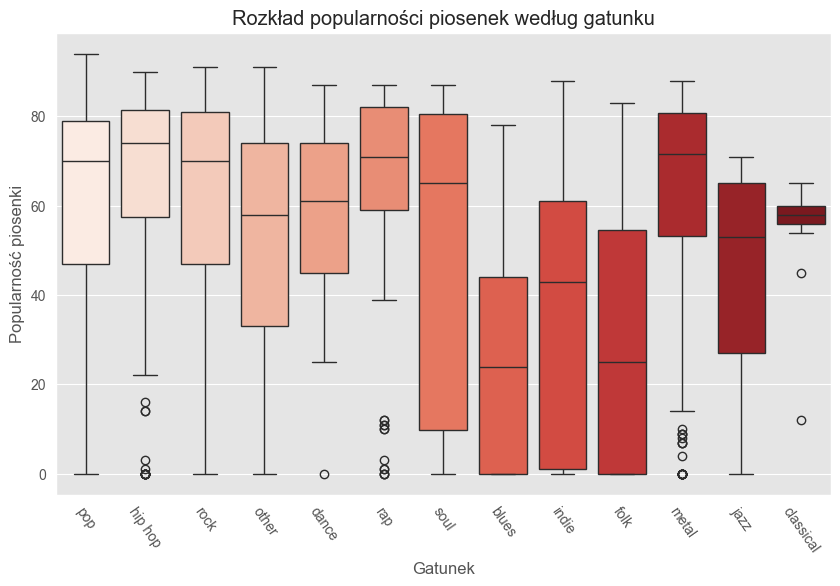

In [502]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='new genre', y='track pop', data=data, palette='Reds')
plt.title('Rozkład popularności piosenek według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Popularność piosenki')
plt.xticks(rotation=305)
plt.show()

Text(0, 0.5, 'Częstotliwość')

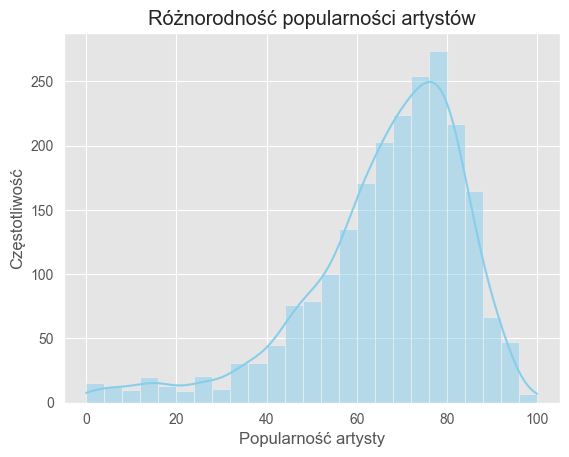

In [506]:
sns.histplot(x='artist pop', data=data, bins=25, kde=True, color='skyblue')
plt.title('Różnorodność popularności artystów')
plt.xlabel('Popularność artysty')
plt.ylabel('Częstotliwość')

Text(0, 0.5, 'Częstotliwość')

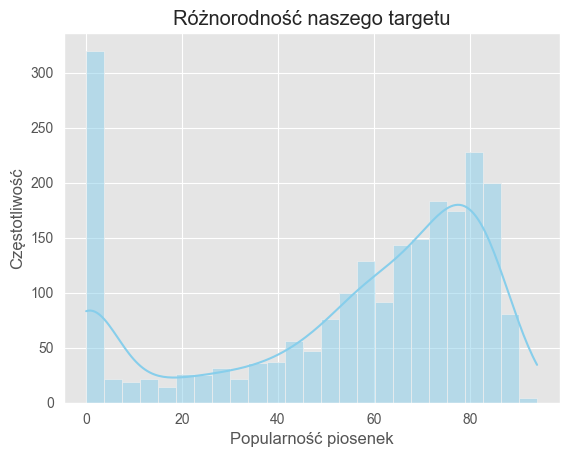

In [507]:
sns.histplot(x='track pop', data=data, bins=25, kde=True, color='skyblue')
plt.title('Różnorodność naszego targetu')
plt.xlabel('Popularność piosenek')
plt.ylabel('Częstotliwość')

In [508]:
data.to_csv('dane_po_EDA.csv')


## ML
- chcemy predykować popularność piosenki na podstawie tych innych wartości 
- dane kategorialne - one hot encoding
- USUNIĘCIE KOLUMN: 
    - zobacz na korealcje 
    - spróbuj PCA
- Standaryzacja wartości
- Regresja liniowa 
- Polynomial reression
- Random forest + grid search 
- MLP
- porównanie - walidacja jeszcze gdzies by się przydała 

In [ ]:
df = data.drop(columns=['track', 'album','artist'])

In [ ]:
df

# One hot encodnig 

In [ ]:
encoded_data = pd.get_dummies(df, columns=['new genre'], drop_first=True, dtype=int)

In [ ]:
encoded_data

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=True, fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

# Sprawdzenie skorelowanych kolumn 

In [ ]:
def cor_features(df):
    highly_correlated_features = set()
    correlation_matrix = df.corr().abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i, j] > 0.6:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                highly_correlated_features.add((colname_i, colname_j, correlation_matrix.iloc[i, j]))
    print("Pairs of highly correlated features:")
    for pair in highly_correlated_features:
        print(pair)

    return encoded_data


In [ ]:
cor_features(encoded_data)

In [ ]:
columns_to_drop = ['tempo', 'acousticness', 'danceability', 'valence', 'instrumentalness']
encoded_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
target = encoded_data['track pop']
encoded_data.drop(columns='track pop', inplace=True)
encoded_data['target'] = target
encoded_data

# Podział danych na treningowe i testowe

In [ ]:
from sklearn.model_selection import train_test_split

X = encoded_data.iloc[:, :-1].values
y = encoded_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_test

In [ ]:
y_train

# Standaryzacja

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train[:, :7])
x_test_scaled = scaler.transform(X_test[:, :7])
X_train[:, :7] = x_train_scaled
X_test[:, :7] = x_test_scaled

In [ ]:
X_train

In [ ]:
X_test

# Modele liniowe 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = [1, 2, 3]
model_pol_1 = make_pipeline(PolynomialFeatures(degree[0]), LinearRegression())
model_pol_2 = make_pipeline(PolynomialFeatures(degree[1]), LinearRegression())
model_pol_3 = make_pipeline(PolynomialFeatures(degree[2]), LinearRegression())

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300]  # różne wartości liczby drzew
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)

# Najlepszy wynik
print("Najlepszy wynik:", -grid_search.best_score_)

In [ ]:
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)

# XGBOOST

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # funkcja straty dla regresji
    'max_depth': 3,                    # maksymalna głębokość drzewa
    'learning_rate': 0.1,              # współczynnik uczenia
}


# Walidacja

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def score_of_model(model):
    mse_score = []

    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(x_train_fold, y_train_fold)

        val_pred = model.predict(x_val_fold)
        mse = mean_squared_error(y_val_fold, val_pred)
        mse_score.append(mse)

    return mse_score

validation_tab = pd.DataFrame(columns=['Model', 'Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5'])
scores = [np.mean(score_of_model(model_pol_1)), np.mean(score_of_model(model_pol_2)), np.mean(score_of_model(model_pol_3)), np.mean(score_of_model(model_rf))]
models= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest']
validation_tab['Mean Score'] = scores
validation_tab['Model'] = models
validation_tab.iloc[0, 1:6] = score_of_model(model_pol_1)
validation_tab.iloc[1, 1:6] = score_of_model(model_pol_2)
validation_tab.iloc[2, 1:6] = score_of_model(model_pol_3)
validation_tab.iloc[3, 1:6] = score_of_model(model_rf)
validation_tab

# MLP 

In [ ]:
import tensorflow as tf

y_train = y_train.astype(float)
y_test = y_test.astype(float)

model_mlp = tf.keras.Sequential([
    tf.keras.Input(shape=(17,)),  # Warstwa wejściowa
    tf.keras.layers.Dense(64, activation='relu'),  # Warstwa wejściowa
    tf.keras.layers.Dense(32, activation='relu'),  # Ukryta warstwa
    tf.keras.layers.Dense(1, activation='linear')  # Warstwa wyjściowa z liniową funkcją aktywacji
])

model_mlp.compile(optimizer='adam', loss='mean_squared_error')
model_mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
predictions = model_mlp.predict(X_test)


# Ocena

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_pol_1.fit(X_train, y_train)
model_pol_2.fit(X_train, y_train)
model_pol_3.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb = xgb.train(params, dtrain, num_boost_round=100)


y_pred_pol_1 = model_pol_1.predict(X_test)
y_pred_pol_2 = model_pol_2.predict(X_test)
y_pred_pol_3 = model_pol_3.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(dtest)

lista_mse = [mean_squared_error(y_test, y_pred_pol_1), mean_squared_error(y_test, y_pred_pol_2),  mean_squared_error(y_test, y_pred_pol_3), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgb), mean_squared_error(y_test, predictions)]
lista_mae = [mean_absolute_error(y_test, y_pred_pol_1), mean_absolute_error(y_test, y_pred_pol_2),  mean_absolute_error(y_test, y_pred_pol_3), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_xgb), mean_absolute_error(y_test, predictions)]
lista_r = [r2_score(y_test, y_pred_pol_1), r2_score(y_test, y_pred_pol_2),  r2_score(y_test, y_pred_pol_3), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), r2_score(y_test, predictions)]
models= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest', 'XGBOOST', 'MLP']

error_tab  = pd.DataFrame()
error_tab['Model'] = models
error_tab['MSE'] = lista_mse
error_tab['MAE'] = lista_mae
error_tab['R^2'] = lista_r

In [ ]:
error_tab

In [ ]:
def wykres(y_test, y_pred, model_name, ax):
    sns.scatterplot(x=y_test, y=y_pred, ax=ax)
    ax.set(xlabel='Actual test values', ylabel=f'Predicted values')
    ax.set_title(f'{model_name}')
    
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

wykres(y_test, y_pred_pol_1, 'Model polynomial 1', axes[0, 0])
wykres(y_test, y_pred_pol_2, 'Model polynomial 2', axes[0, 1])
wykres(y_test, y_pred_pol_3, 'Model polynomial 3', axes[1, 0])
wykres(y_test, y_pred_rf, 'Model random forest', axes[1, 1])
wykres(y_test, y_pred_xgb, 'Model XGBOOST', axes[2, 0])
y_pred = predictions.flatten()
wykres(y_test, y_pred, 'Model MLP', axes[2, 1])

plt.tight_layout()
plt.show()

In [ ]:
def tabela(y_pred):
    wyniki = pd.DataFrame()
    wyniki['y_pred'] = y_pred
    wyniki['y_true'] = y_test
    return wyniki

## Wykresy błędów słupkowe

In [ ]:
var = error_tab[(error_tab['Model'] != 'polynomial (2 degree)') & (error_tab['Model'] != 'polynomial (3 degree)')]
palette = sns.color_palette("deep", len(var))
plt.bar(var['Model'], var['MSE'], color=palette)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Models')
plt.tight_layout()

In [ ]:
tabela(y_pred_xgb)

Tutaj jeśli chodzi o regresję, czyli predykcję popularności chciałabym, aby zrobić opcję na streamlicie, że wyświetla mi się opcja predykcji i mamy tam do wpisania następujące elementy:
- artysta (filtrami wyszukuje jaką ma popularność na spotify, jeśli artysta jest Inny lub nie ma go w bazie to dajemy popularność 0) 
- rok ustalony na aktualny 
- gatunek (do wyboru: inne, pop, hip hop, dance, folk, indie, jazz, metal, rock, soul) 
- duration 
- energy 
- loudness
- speechiness 
- liveness

# EWENTUALNA KLASYFIKACJA GATUNKÓW

# CLASTROWANIE

1. Popraw zbiór
2. Kmeans i tu można aploadować playliste użytkownika i robić mu nową playliste wykorzystując clusteryzację i mieszanie jakby z tych innych clustrów 
3. To szukanie podobnych piosenek wpisując nazwe piosenki - tutaj wykorzystanie cosine similarity - pytanie co zrobić z tekstowymi kolumnami - NLP? 

In [ ]:
#df['description'] = data['track'] + data['artist'] + data['album']
unique_genres = df['new genre'].unique()
genre_to_number = {genre: num for num, genre in enumerate(unique_genres)}
df['new genre'] = df['new genre'].map(genre_to_number)

In [ ]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_scaled

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
n_clusters = range(2,21)
ssd = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(df)
    preds = km.predict(df) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(df_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

In [ ]:
plt.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
plt.show()

In [ ]:
for n, s in zip(n_clusters, ssd):
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))

In [ ]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [ ]:
k=6

model = (KMeans(n_clusters=k, random_state=42)).fit(df_scaled)
pred = model.predict(df_scaled)

In [ ]:
df_scaled['cluster'] = model.labels_

df_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(df_scaled)


In [ ]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

In [ ]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=df_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.suptitle('Clusters view with 3 dimensions using PCA')
ax = Axes3D(fig)

ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired')

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.show()